# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import nltk
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.multioutput import MultiOutputClassifier
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  f1_score,precision_score,recall_score,accuracy_score,make_scorer
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
nltk.download('wordnet') # download for lemmatization
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mdranamahmud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mdranamahmud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mdranamahmud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# load data from database
engine = create_engine('sqlite:///etl.db')
df = pd.read_sql_table("message_table",engine)
X = df['message']
Y = df.drop(['id', 'message', 'original', 'genre'], axis = 1)

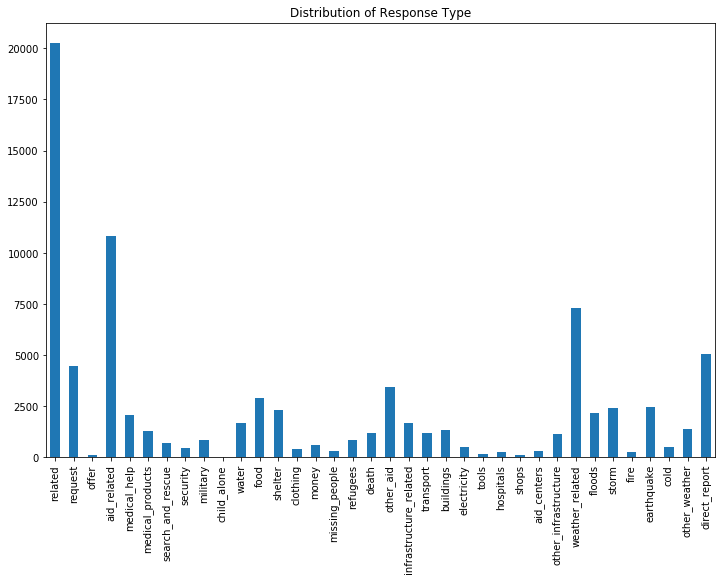

In [16]:
plt.figure(figsize=(12,8))
Y.sum().plot(kind='bar')
plt.title("Distribution of Response Type")
plt.savefig("Distribution of Response Type.png",dpi=300)

### 2. Write a tokenization function to process your text data

In [71]:
def tokenize(text):
    # Normalize text
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    # Tokenize text
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words("english")]
    # Reduce words to their stems
    words = [PorterStemmer().stem(w) for w in words]
    words = [WordNetLemmatizer().lemmatize(w) for w in words]

    return words

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [72]:
# compute bag of word counts and tf-idf values
vectorizer = TfidfVectorizer( tokenizer=tokenize ,use_idf=True, smooth_idf=True, sublinear_tf=False)


# clf = MultiOutputClassifier(RandomForestClassifier(random_state = 42))
clf = RandomForestClassifier(random_state = 42)

pipeline = Pipeline([('vectorizer',vectorizer), ('clf',clf)])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [74]:
# do prediction
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)


In [75]:
def get_metrics(test_value, predicted_value):
    """
    get_metrics calculates f1 score, accuracy and recall

    Args:
        test_value (list): list of actual values
        predicted_value (list): list of predicted values

    Returns:
        dictionray: a dictionary with accuracy, f1 score, precision and recall
    """
    accuracy = accuracy_score(test_value,predicted_value)
    precision =round( precision_score(test_value,predicted_value,average='micro'))
    recall = recall_score(test_value,predicted_value,average='micro')
    f1 = f1_score(test_value,predicted_value,average='micro')
    return {'Accuracy':accuracy, 'f1 score':f1,'Precision':precision, 'Recall':recall}

In [76]:
train_results = []
for i,column in enumerate(y_train.columns):
    result = get_metrics(y_train.loc[:,column].values,y_pred_train[:,i])
    train_results.append(result)
train_results_df = pd.DataFrame(train_results)
train_results_df    

,Accuracy,f1 score,Precision,Recall
0,0.998319,0.998319,1.0,0.998319
1,0.999338,0.999338,1.0,0.999338
2,1.000000,1.000000,1.0,1.000000
3,0.998981,0.998981,1.0,0.998981
4,0.999745,0.999745,1.0,0.999745
5,0.999847,0.999847,1.0,0.999847
6,0.999898,0.999898,1.0,0.999898
7,0.999694,0.999694,1.0,0.999694
8,0.999949,0.999949,1.0,0.999949
9,1.000000,1.000000,1.0,1.000000


In [77]:
test_results = []
for i,column in enumerate(y_test.columns):
    result = get_metrics(y_test.loc[:,column].values,y_pred_test[:,i])
    test_results.append(result)
test_results_df = pd.DataFrame(test_results)
test_results_df

,Accuracy,f1 score,Precision,Recall
0,0.831322,0.831322,1.0,0.831322
1,0.891826,0.891826,1.0,0.891826
2,0.995569,0.995569,1.0,0.995569
3,0.760275,0.760275,1.0,0.760275
4,0.914897,0.914897,1.0,0.914897
5,0.950344,0.950344,1.0,0.950344
6,0.970970,0.970970,1.0,0.970970
7,0.983040,0.983040,1.0,0.983040
8,0.969442,0.969442,1.0,0.969442
9,1.000000,1.000000,1.0,1.000000


Text(0.5,1,'Result for Training Data')

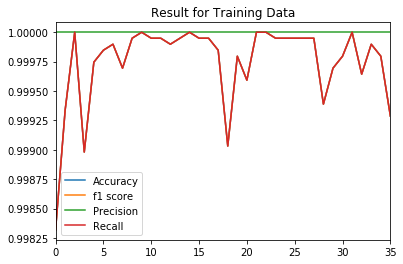

In [78]:
train_results_df.plot()
plt.title("Result for Training Data")

Text(0.5,1,'Result for Test Data')

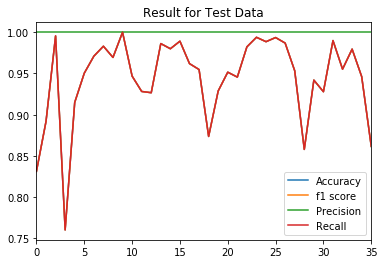

In [79]:
%matplotlib inline
test_results_df.plot()
plt.title("Result for Test Data")

In [80]:
train_results_df.mean()

Accuracy     0.999748
f1 score     0.999748
Precision    1.000000
Recall       0.999748
dtype: float64

In [81]:
test_results_df.mean()

Accuracy     0.944436
f1 score     0.944436
Precision    1.000000
Recall       0.944436
dtype: float64

### 6. Improve your model
Use grid search to find better parameters. 

In [82]:
# write custom scoring for multiclass classifier
def multi_class_score(y_true, y_pred):
    accuracy_results = []
    for i,column in enumerate(y_train.columns):
        accuracy = accuracy_score(y_true.loc[:,column].values,y_pred[:,i])
        accuracy_results.append(accuracy)
    avg_accuracy = np.mean(accuracy_results)
    return avg_accuracy

In [83]:
score = make_scorer(multi_class_score)

In [84]:
parameters = {'clf__criterion':['gini','entropy'],
 'clf__max_features': ['auto', 'sqrt'],
 'clf__max_depth': [5,10, 20, 30, 40],
              'clf__random_state': [42]}

cv_rf_tuned = GridSearchCV(pipeline, param_grid=parameters, scoring=score,
                  n_jobs = -1, cv = 5, refit = True, return_train_score=True,verbose=10)
cv_rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 51.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 59.2min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 79.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 104.6min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 114.9min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 120.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [85]:
cv_rf_tuned.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 40,
 'clf__max_features': 'auto',
 'clf__random_state': 42}

In [86]:
best_model_rf_tuned = cv_rf_tuned.best_estimator_

In [87]:
cv_rf_tuned.best_score_

0.9335693653184887

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [88]:
# predict using best estimator
# do prediction
y_pred_train = best_model_rf_tuned.predict(X_train)
y_pred_test = best_model_rf_tuned.predict(X_test)

In [89]:
train_results = []
for i,column in enumerate(y_train.columns):
    result = get_metrics(y_train.loc[:,column].values,y_pred_train[:,i])
    train_results.append(result)
train_results_df = pd.DataFrame(train_results)
train_results_df    

,Accuracy,f1 score,Precision,Recall
0,0.766249,0.766249,1.0,0.766249
1,0.860177,0.860177,1.0,0.860177
2,0.995518,0.995518,1.0,0.995518
3,0.808425,0.808425,1.0,0.808425
4,0.926447,0.926447,1.0,0.926447
5,0.955124,0.955124,1.0,0.955124
6,0.974022,0.974022,1.0,0.974022
7,0.981815,0.981815,1.0,0.981815
8,0.967757,0.967757,1.0,0.967757
9,1.000000,1.000000,1.0,1.000000


In [90]:
test_results = []
for i,column in enumerate(y_test.columns):
    result = get_metrics(y_test.loc[:,column].values,y_pred_test[:,i])
    test_results.append(result)
test_results_df = pd.DataFrame(test_results)
test_results_df

,Accuracy,f1 score,Precision,Recall
0,0.757983,0.757983,1.0,0.757983
1,0.836975,0.836975,1.0,0.836975
2,0.995569,0.995569,1.0,0.995569
3,0.708785,0.708785,1.0,0.708785
4,0.914591,0.914591,1.0,0.914591
5,0.948969,0.948969,1.0,0.948969
6,0.970817,0.970817,1.0,0.970817
7,0.983040,0.983040,1.0,0.983040
8,0.968220,0.968220,1.0,0.968220
9,1.000000,1.000000,1.0,1.000000


Text(0.5,1,'Result for Training Data')

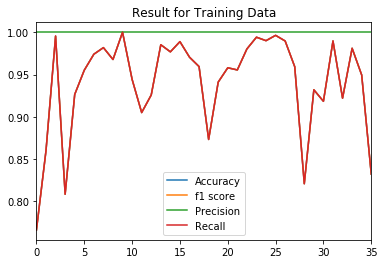

In [91]:
train_results_df.plot()
plt.title("Result for Training Data")

Text(0.5,1,'Result for Test Data')

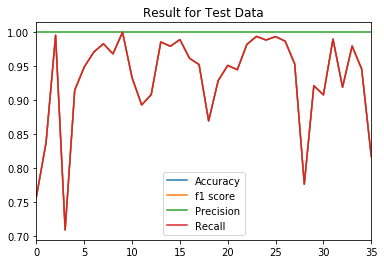

In [92]:
%matplotlib inline
test_results_df.plot()
plt.title("Result for Test Data")

In [93]:
train_results_df.mean()

Accuracy     0.940957
f1 score     0.940957
Precision    1.000000
Recall       0.940957
dtype: float64

In [94]:
test_results_df.mean()

Accuracy     0.931555
f1 score     0.931555
Precision    1.000000
Recall       0.931555
dtype: float64

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

## other machine learning model

In [95]:
# knc
parameters = {
#     'clf__kernel': ['linear', 'rbf'],
    'clf__n_neighbors':[1, 2,3,4,5,6,7,8,9,10, 11, 12, 13,14,15]
}
knc_clf = KNeighborsClassifier()
pipeline = Pipeline([('vectorizer',vectorizer), ('clf',knc_clf)])


clf_kn = GridSearchCV(pipeline, param_grid=parameters, scoring=score,
                  n_jobs = -1, cv = 5, refit = True, return_train_score=True,verbose=10)

clf_kn.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done  68 out of  75 | elapsed: 82.5min remaining:  8.5min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 86.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [96]:
clf_kn.best_score_

0.939397411660754

In [97]:
clf_kn.best_estimator_

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x7fa0f51f2d40>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      m

In [98]:
clf_kn.best_params_

{'clf__n_neighbors': 15}

In [99]:
best_model_kn = clf_kn.best_estimator_

In [100]:
# predict using best estimator
# do prediction
y_pred_train = best_model_kn.predict(X_train)
y_pred_test = best_model_kn.predict(X_test)

In [101]:
train_results = []
for i,column in enumerate(y_train.columns):
    result = get_metrics(y_train.loc[:,column].values,y_pred_train[:,i])
    train_results.append(result)
train_results_df = pd.DataFrame(train_results)
train_results_df    

,Accuracy,f1 score,Precision,Recall
0,0.820650,0.820650,1.0,0.820650
1,0.893337,0.893337,1.0,0.893337
2,0.995518,0.995518,1.0,0.995518
3,0.741188,0.741188,1.0,0.741188
4,0.924613,0.924613,1.0,0.924613
5,0.953087,0.953087,1.0,0.953087
6,0.973411,0.973411,1.0,0.973411
7,0.981663,0.981663,1.0,0.981663
8,0.968215,0.968215,1.0,0.968215
9,1.000000,1.000000,1.0,1.000000


In [102]:
test_results = []
for i,column in enumerate(y_test.columns):
    result = get_metrics(y_test.loc[:,column].values,y_pred_test[:,i])
    test_results.append(result)
test_results_df = pd.DataFrame(test_results)
test_results_df

,Accuracy,f1 score,Precision,Recall
0,0.798625,0.798625,1.0,0.798625
1,0.872880,0.872880,1.0,0.872880
2,0.995569,0.995569,1.0,0.995569
3,0.698090,0.698090,1.0,0.698090
4,0.915355,0.915355,1.0,0.915355
5,0.952788,0.952788,1.0,0.952788
6,0.971123,0.971123,1.0,0.971123
7,0.983040,0.983040,1.0,0.983040
8,0.969290,0.969290,1.0,0.969290
9,1.000000,1.000000,1.0,1.000000


Text(0.5,1,'Result for Training Data')

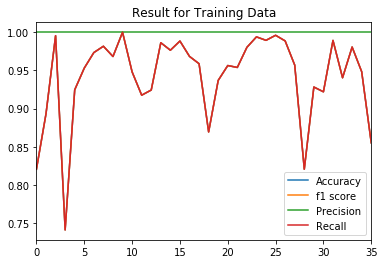

In [103]:
train_results_df.plot()
plt.title("Result for Training Data")

Text(0.5,1,'Result for Test Data')

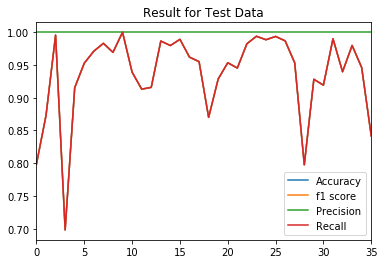

In [104]:
%matplotlib inline
test_results_df.plot()
plt.title("Result for Test Data")

In [105]:
test_results_df.mean()

Accuracy     0.937089
f1 score     0.937089
Precision    1.000000
Recall       0.937089
dtype: float64

In [106]:
train_results_df.mean()

Accuracy     0.942413
f1 score     0.942413
Precision    1.000000
Recall       0.942413
dtype: float64

In [108]:
# function for making bigram token
def tokenize_bigram(text):
    # Normalize text
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    # Tokenize text
    words = word_tokenize(text)
    words = bigrams(words)
    return words

In [109]:
# compute bag of word counts and tf-idf values
vectorizer_bigram = TfidfVectorizer( tokenizer=tokenize_bigram ,use_idf=True, smooth_idf=True, sublinear_tf=False)

# clf = MultiOutputClassifier(RandomForestClassifier(random_state = 42))
clf_bigram = RandomForestClassifier(random_state = 42)

pipeline_bigram = Pipeline([('vectorizer',vectorizer_bigram), ('clf',clf_bigram)])

In [110]:
parameters = {'clf__criterion':['gini','entropy'],
 'clf__max_features': ['auto', 'sqrt'],
 'clf__max_depth': [5,10, 20, 30, 40],
              'clf__random_state': [42]}

cv_bigrams = GridSearchCV(pipeline_bigram, param_grid=parameters, scoring=score,
                  n_jobs = -1, cv = 5, refit = True, return_train_score=True,verbose=10)
cv_bigrams.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 17.9min remaining:   44.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [111]:
cv_bigrams.best_score_

0.9283921174844432

In [112]:
cv_bigrams.best_score_

0.9283921174844432

In [113]:
train_results = []
for i,column in enumerate(y_train.columns):
    result = get_metrics(y_train.loc[:,column].values,y_pred_train[:,i])
    train_results.append(result)
train_results_df = pd.DataFrame(train_results)
train_results_df    

,Accuracy,f1 score,Precision,Recall
0,0.820650,0.820650,1.0,0.820650
1,0.893337,0.893337,1.0,0.893337
2,0.995518,0.995518,1.0,0.995518
3,0.741188,0.741188,1.0,0.741188
4,0.924613,0.924613,1.0,0.924613
5,0.953087,0.953087,1.0,0.953087
6,0.973411,0.973411,1.0,0.973411
7,0.981663,0.981663,1.0,0.981663
8,0.968215,0.968215,1.0,0.968215
9,1.000000,1.000000,1.0,1.000000


In [114]:
test_results = []
for i,column in enumerate(y_test.columns):
    result = get_metrics(y_test.loc[:,column].values,y_pred_test[:,i])
    test_results.append(result)
test_results_df = pd.DataFrame(test_results)
test_results_df

,Accuracy,f1 score,Precision,Recall
0,0.798625,0.798625,1.0,0.798625
1,0.872880,0.872880,1.0,0.872880
2,0.995569,0.995569,1.0,0.995569
3,0.698090,0.698090,1.0,0.698090
4,0.915355,0.915355,1.0,0.915355
5,0.952788,0.952788,1.0,0.952788
6,0.971123,0.971123,1.0,0.971123
7,0.983040,0.983040,1.0,0.983040
8,0.969290,0.969290,1.0,0.969290
9,1.000000,1.000000,1.0,1.000000


Text(0.5,1,'Result for Training Data')

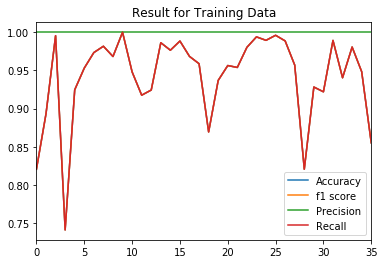

In [115]:
train_results_df.plot()
plt.title("Result for Training Data")

Text(0.5,1,'Result for Test Data')

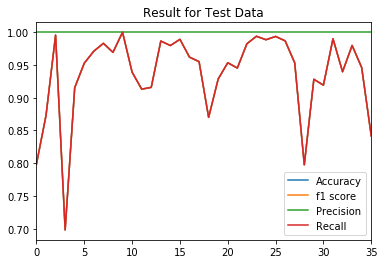

In [116]:
%matplotlib inline
test_results_df.plot()
plt.title("Result for Test Data")

In [117]:
train_results_df.mean()

Accuracy     0.942413
f1 score     0.942413
Precision    1.000000
Recall       0.942413
dtype: float64

In [118]:
test_results_df.mean()

Accuracy     0.937089
f1 score     0.937089
Precision    1.000000
Recall       0.937089
dtype: float64

### 9. Export your model as a pickle file

In [119]:
# we'll choose random forest with 
import pickle


In [120]:
# save the model to disk
filename = 'best_model_bi.pkl'
pickle.dump(best_model_bi, open(filename, 'wb'))

In [121]:

filename = 'best_model_kn.pkl'
pickle.dump(best_model_kn, open(filename, 'wb'))

In [122]:

filename = 'best_model_rf_tuned.pkl'
pickle.dump(best_model_rf_tuned, open(filename, 'wb'))

k neighbours classifier and random forest peroforms almost similarlry. We'll choose random forest for classification as the best model.

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.